In [1]:
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from fbprophet import Prophet

C:\Users\Suyash\anaconda3\envs\udemy-ml-env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
tcs_df = pd.read_csv("TCS_stock_history.csv")
tcs_df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


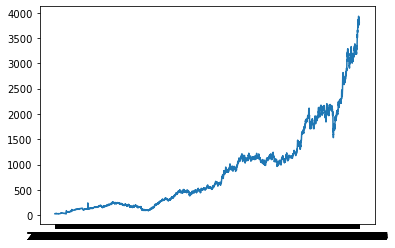

In [3]:
plt.plot(tcs_df['Date'], tcs_df['Open'])

In [4]:
tcs_df_prophet = tcs_df[['Date','Open']].rename(columns={'Date':'ds', 'Open':'y'})
tcs_df_prophet

,ds,y
0,2002-08-12,28.794172
1,2002-08-13,29.556316
2,2002-08-14,29.184536
3,2002-08-15,27.111877
4,2002-08-16,26.972458
...,...,...
4458,2021-09-24,3890.000000
4459,2021-09-27,3900.000000
4460,2021-09-28,3850.000000
4461,2021-09-29,3759.800049


In [5]:
m = Prophet()

In [6]:
m.fit(tcs_df_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Suyash\anaconda3\envs\udemy-ml-env\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [7]:
forecast = m.make_future_dataframe(periods=365)
forecast = m.predict(forecast)

C:\Users\Suyash\anaconda3\envs\udemy-ml-env\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Suyash\anaconda3\envs\udemy-ml-env\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


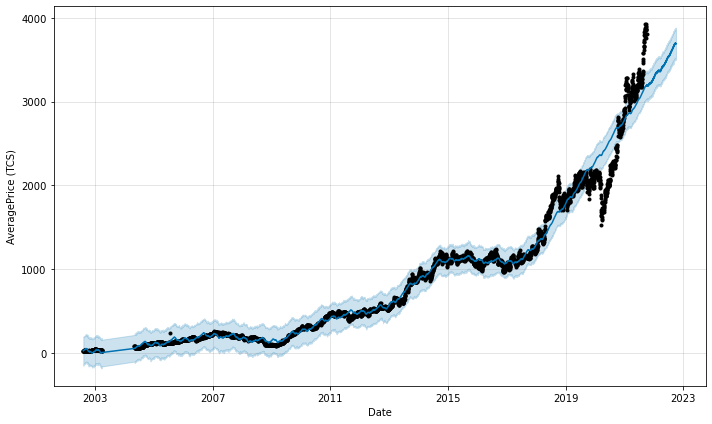

In [8]:
figure = m.plot(forecast, xlabel='Date', ylabel='AveragePrice (TCS)')